In [1]:
import os
import numpy as np
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

import utils

from sklearn.metrics import roc_auc_score
from scipy import stats

In [2]:
data = 'math'

if data == 'eu': 
    n_repeats = 20
    timesteps = 41
    data_name = f'si_eu_20r_41t'
    with open(f'../data_proc/{data_name}/history.pkl', 'rb') as file: 
        graphs = pkl.load(file)

if data == 'uci': 
    n_repeats = 20
    timesteps = 29
    data_name = f'si_uci_20r_29t'
    with open(f'../data_proc/{data_name}/history.pkl', 'rb') as file: 
        graphs = pkl.load(file)

if data == 'alpha': 
    n_repeats = 20
    timesteps = 16
    data_name = f'si_alpha_20r_16t'
    with open(f'../data_proc/{data_name}/history.pkl', 'rb') as file: 
        graphs = pkl.load(file)

if data == 'otc':  
    n_repeats = 20
    timesteps = 35
    data_name = f'si_otc_20r_35t'
    with open(f'../data_proc/{data_name}/history.pkl', 'rb') as file: 
        graphs = pkl.load(file)

if data == 'math': 
    n_repeats = 20
    timesteps = 20
    data_name = f'si_math_20r_20t'
    with open(f'../data_proc/{data_name}/history.pkl', 'rb') as file: 
        graphs = pkl.load(file)

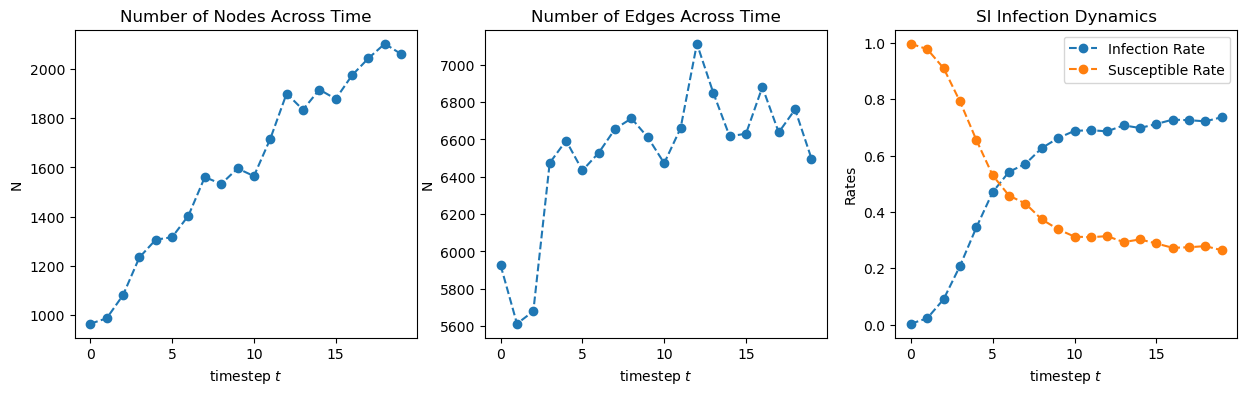

In [4]:
n_nodes = [[] for i in range(n_repeats)]
n_edges = [[] for i in range(n_repeats)]
inf_rates = [[] for i in range(n_repeats)]
sus_rates = [[] for i in range(n_repeats)]
for r in range(n_repeats): 
    graphs_current = graphs[r * timesteps: (r + 1) * timesteps]
    for idx, g in enumerate(graphs_current): 
        n_nodes[r].append(g.number_of_nodes())
        n_edges[r].append(g.number_of_edges())
        inf_rates[r].append(utils.sis_infected_rate(g))
        sus_rates[r].append(utils.sis_susceptible_rate(g))
    
fig, ax = plt.subplots(ncols=3, figsize=(15, 4))

ax[0].plot(np.mean(n_nodes, axis=0), '--o')
ax[0].set_title('Number of Nodes Across Time')
ax[0].set_xlabel('timestep $t$')
ax[0].set_ylabel('N')

ax[1].plot(np.mean(n_edges, axis=0), '--o')
ax[1].set_title('Number of Edges Across Time')
ax[1].set_xlabel('timestep $t$')
ax[1].set_ylabel('N')

ax[2].plot(np.mean(inf_rates, axis=0), '--o', label=f'Infection Rate')
ax[2].plot(np.mean(sus_rates, axis=0), '--o', label=f'Susceptible Rate')
ax[2].set_title('SI Infection Dynamics')
ax[2].set_xlabel('timestep $t$')
ax[2].set_ylabel('Rates')
ax[2].legend();

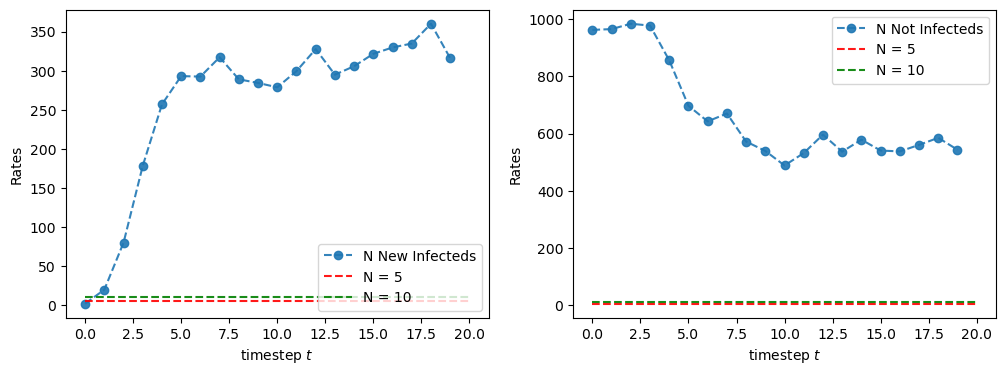

In [5]:
n_infecteds = [[] for i in range(n_repeats)]
n_ninfecteds = [[] for i in range(n_repeats)]

for r in range(n_repeats): 
    graphs_current = graphs[r * timesteps: (r + 1) * timesteps]
    for idx, g in enumerate(graphs_current): 
        y = np.array(list(nx.get_node_attributes(g, 'exposure').values()))
        y_mask = np.array(list(nx.get_node_attributes(g, 'positive').values())) == 0
        n_infecteds[r].append(np.sum(y[y_mask]))
        n_ninfecteds[r].append(np.sum(y[y_mask] == 0))

n_infecteds = np.array(n_infecteds)
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].plot(np.mean(n_infecteds, axis=0), '--o', label='N New Infecteds', alpha=.9)
ax[0].hlines(y=5, xmin=0, xmax=timesteps, colors='red', linestyles='--', label='N = 5', alpha=.9)
ax[0].hlines(y=10, xmin=0, xmax=timesteps, colors='green', linestyles='--', label='N = 10', alpha=.9)
ax[0].set_xlabel('timestep $t$')
ax[0].set_ylabel('Rates')
ax[0].legend();

ax[1].plot(np.mean(n_ninfecteds, axis=0), '--o', label='N Not Infecteds', alpha=.9)
ax[1].hlines(y=5, xmin=0, xmax=timesteps, colors='red', linestyles='--', label='N = 5', alpha=.9)
ax[1].hlines(y=10, xmin=0, xmax=timesteps, colors='green', linestyles='--', label='N = 10', alpha=.9)
ax[1].set_xlabel('timestep $t$')
ax[1].set_ylabel('Rates')
ax[1].legend();

In [6]:
homs_l, homs_t = [[] for i in range(n_repeats)], [[] for i in range(n_repeats)]

for r in range(n_repeats): 
    graphs_current = graphs[r * timesteps: (r + 1) * timesteps]
    for idx, g in enumerate(graphs_current): 
        hom_l = utils.compute_label_homophily(g)
        hom_t = utils.compute_transition_homophily(g)
        homs_l[r].append(hom_l)
        homs_t[r].append(hom_t)
        
homs_lm, homs_le = utils.compute_means_errs(np.array(homs_l))
homs_tm, homs_te = utils.compute_means_errs(np.array(homs_t))

perf_m_sgc, perf_e_sgc, perf_sgc = utils.compute_perfs_stat_mean(f'./{data_name}', 'sgc', 8, n_repeats, timesteps, top_k=4)
perf_m_gcn, perf_e_gcn, perf_gcn = utils.compute_perfs_stat_mean(f'.{data_name}', 'gcn', 8, n_repeats, timesteps, top_k=4)
perf_m_gin, perf_e_gin, perf_gin = utils.compute_perfs_stat_mean(f'./{data_name}', 'gin', 8, n_repeats, timesteps, top_k=4)
perf_m_gat, perf_e_gat, perf_gat = utils.compute_perfs_stat_mean(f'./{data_name}', 'gat', 8, n_repeats, timesteps, top_k=4)

perf_m_sage, perf_e_sage, perf_sage = utils.compute_perfs_stat_mean(f'./{data_name}', 'gsage', 16, n_repeats, timesteps, top_k=4)
perf_m_gcnii, perf_e_gcnii, perf_gcnii = utils.compute_perfs_stat_mean(f'./{data_name}', 'gcnii', 16, n_repeats, timesteps, top_k=4)
perf_m_fagcn, perf_e_fagcn, perf_fagcn = utils.compute_perfs_stat_mean(f'./{data_name}', 'fagcn', 16, n_repeats, timesteps, top_k=4)

sgc: 0.82 $\pm$ 0.01
gcn: 0.82 $\pm$ 0.01
gin: 0.86 $\pm$ 0.01
gat: 0.81 $\pm$ 0.01
gsage: 0.88 $\pm$ 0.01
gcnii: 0.88 $\pm$ 0.01
fagcn: 0.80 $\pm$ 0.01


SGC: -0.64 $\pm$ 0.14
SGC: 0.86 $\pm$ 0.07
GCN: -0.63 $\pm$ 0.13
GCN: 0.85 $\pm$ 0.07
GIN: -0.28 $\pm$ 0.21
GIN: 0.60 $\pm$ 0.15
GAT: -0.55 $\pm$ 0.17
GAT: 0.68 $\pm$ 0.14
SAGE: 0.21 $\pm$ 0.25
SAGE: -0.01 $\pm$ 0.27
GCNII: -0.55 $\pm$ 0.13
GCNII: 0.81 $\pm$ 0.09
FAGCN: -0.44 $\pm$ 0.14
FAGCN: 0.63 $\pm$ 0.15


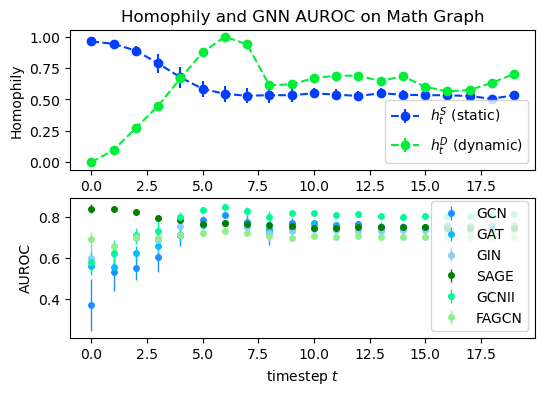

In [7]:
threshold = 10
sgc_hl_m, sgc_hl_e = utils.compute_correlation(homs_l, perf_sgc, n_infecteds, threshold)
sgc_ht_m, sgc_ht_e = utils.compute_correlation(homs_t, perf_sgc, n_infecteds, threshold)

gcn_hl_m, gcn_hl_e = utils.compute_correlation(homs_l, perf_gcn, n_infecteds, threshold)
gcn_ht_m, gcn_ht_e = utils.compute_correlation(homs_t, perf_gcn, n_infecteds, threshold)

gin_hl_m, gin_hl_e = utils.compute_correlation(homs_l, perf_gin, n_infecteds, threshold)
gin_ht_m, gin_ht_e = utils.compute_correlation(homs_t, perf_gin, n_infecteds, threshold)

gat_hl_m, gat_hl_e = utils.compute_correlation(homs_l, perf_gat, n_infecteds, threshold)
gat_ht_m, gat_ht_e = utils.compute_correlation(homs_t, perf_gat, n_infecteds, threshold)

sage_hl_m, sage_hl_e = utils.compute_correlation(homs_l, perf_sage, n_infecteds, threshold)
sage_ht_m, sage_ht_e = utils.compute_correlation(homs_t, perf_sage, n_infecteds, threshold)

gcnii_hl_m, gcnii_hl_e = utils.compute_correlation(homs_l, perf_gcnii, n_infecteds, threshold)
gcnii_ht_m, gcnii_ht_e = utils.compute_correlation(homs_t, perf_gcnii, n_infecteds, threshold)

fagcn_hl_m, fagcn_hl_e = utils.compute_correlation(homs_l, perf_fagcn, n_infecteds, threshold)
fagcn_ht_m, fagcn_ht_e = utils.compute_correlation(homs_t, perf_fagcn, n_infecteds, threshold)

print(fr'SGC: {sgc_hl_m:.2f} $\pm$ {sgc_hl_e:.2f}')
print(fr'SGC: {sgc_ht_m:.2f} $\pm$ {sgc_ht_e:.2f}')

print(fr'GCN: {gcn_hl_m:.2f} $\pm$ {gcn_hl_e:.2f}')
print(fr'GCN: {gcn_ht_m:.2f} $\pm$ {gcn_ht_e:.2f}')

print(fr'GIN: {gin_hl_m:.2f} $\pm$ {gin_hl_e:.2f}')
print(fr'GIN: {gin_ht_m:.2f} $\pm$ {gin_ht_e:.2f}')

print(fr'GAT: {gat_hl_m:.2f} $\pm$ {gat_hl_e:.2f}')
print(fr'GAT: {gat_ht_m:.2f} $\pm$ {gat_ht_e:.2f}')

print(fr'SAGE: {sage_hl_m:.2f} $\pm$ {sage_hl_e:.2f}')
print(fr'SAGE: {sage_ht_m:.2f} $\pm$ {sage_ht_e:.2f}')

print(fr'GCNII: {gcnii_hl_m:.2f} $\pm$ {gcnii_hl_e:.2f}')
print(fr'GCNII: {gcnii_ht_m:.2f} $\pm$ {gcnii_ht_e:.2f}')

print(fr'FAGCN: {fagcn_hl_m:.2f} $\pm$ {fagcn_hl_e:.2f}')
print(fr'FAGCN: {fagcn_ht_m:.2f} $\pm$ {fagcn_ht_e:.2f}')

plt.style.use('seaborn-bright')
# plt.style.use('seaborn-v0_8-poster')
# plt.rc('font', size=10)
# plt.rc('legend', fontsize=8)
fig, ax = plt.subplots(nrows=2, figsize=(6, 4))

ax[0].errorbar(x=np.arange(homs_lm.shape[0]), y=homs_lm, yerr=homs_le, fmt='--o', label='$h_t^S$ (static)')
ax[0].errorbar(x=np.arange(homs_tm.shape[0]), y=utils.normalize(homs_tm), yerr=homs_te, fmt='--o', label='$h_t^D$ (dynamic)')
ax[0].set_title(f'Homophily and GNN AUROC on Math Graph')
ax[0].set_ylabel('Homophily')
ax[0].legend(loc='lower right')

ax[1].errorbar(x=np.arange(perf_m_gcn.shape[0]), y=perf_m_gcn, yerr=perf_e_gcn, color='dodgerblue', fmt='o', lw=1, ms=4, label=fr'GCN')
ax[1].errorbar(x=np.arange(perf_m_gat.shape[0]), y=perf_m_gat, yerr=perf_e_gat, color='deepskyblue', fmt='o', lw=1, ms=4, label=fr'GAT')
ax[1].errorbar(x=np.arange(perf_m_gin.shape[0]), y=perf_m_gin, yerr=perf_e_gin, color='lightskyblue', fmt='o', lw=1, ms=4, label=fr'GIN')

ax[1].errorbar(x=np.arange(perf_m_sage.shape[0]), y=perf_m_sage, yerr=perf_e_sage, color='green', fmt='o', lw=1, ms=4, label=fr'SAGE')
ax[1].errorbar(x=np.arange(perf_m_gcnii.shape[0]), y=perf_m_gcnii, yerr=perf_e_gcnii, color='mediumspringgreen', lw=1, ms=4, fmt='o', label=fr'GCNII')
ax[1].errorbar(x=np.arange(perf_m_fagcn.shape[0]), y=perf_m_fagcn, yerr=perf_e_fagcn, color='lightgreen', fmt='o', lw=1, ms=4, label=fr'FAGCN')

ax[1].set_xlabel('timestep $t$')
ax[1].set_ylabel('AUROC')
ax[1].legend(loc='lower right')
# ax[1].grid()

plt.savefig(f'images/{data}.pdf', format='pdf')

ax[1].set_xlabel('timestep $t$')
ax[1].set_ylabel('AUROC')
ax[1].legend(loc='lower right')
# ax[1].grid()

plt.savefig(f'images/{data}.png', format='png')